In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class StellarClassificationNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(StellarClassificationNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.model(x)
    



# Assuming 8 input features: alpha, delta, u, g, r, i, z, redshift
input_size = 8
num_classes = 3  # Example: GALAXY, STAR, QUASAR

model = StellarClassificationNN(input_size, num_classes)
print(model)

# Dummy data for testing
x = torch.rand(5, input_size)  # Batch of 5 samples
logits = model(x)
print(logits)


StellarClassificationNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)
tensor([[ 0.0642, -0.0715,  0.0265],
        [ 0.0883, -0.0924,  0.0335],
        [ 0.1190, -0.1240,  0.0792],
        [ 0.1122, -0.0726,  0.0941],
        [ 0.0877, -0.0437,  0.0118]], grad_fn=<AddmmBackward0>)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
def load_and_preprocess_data(file_path):
    # Load dataset
    data = pd.read_csv(file_path)
    
    # Select input features
    features = ["alpha", "delta", "u", "g", "r", "i", "z", "redshift"]
    X = data[features]
    
    # Normalize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Encode the target variable
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(data["class"])
    num_classes = len(label_encoder.classes_)  # Get number of unique classes
    
    # Split the data into train/test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)
    
    return X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor, num_classes

In [3]:
import matplotlib.pyplot as plt

# Training function with loss and accuracy tracking
def train_model_with_loss_plot(model, X_train, y_train, X_test, y_test, num_epochs=20, learning_rate=0.001):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Store loss and accuracy values
    loss_history = []
    accuracy_history = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss_history.append(loss.item())  # Record loss
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Evaluation on test set
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = (predicted == y_test).sum().item() / y_test.size(0)
            accuracy_history.append(accuracy)  # Record accuracy
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")
    
    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 6))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), loss_history, linestyle='-', color='b')
    plt.title("Loss Function Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), accuracy_history, linestyle='-', color='g')
    plt.title("Accuracy Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.tight_layout()
    plt.show()


StellarClassificationNN(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=3, bias=True)
  )
)
Epoch [1/100], Loss: 1.0949, Test Accuracy: 0.4315
Epoch [2/100], Loss: 1.0732, Test Accuracy: 0.4583
Epoch [3/100], Loss: 1.0523, Test Accuracy: 0.5071
Epoch [4/100], Loss: 1.0321, Test Accuracy: 0.6012
Epoch [5/100], Loss: 1.0127, Test Accuracy: 0.6350
Epoch [6/100], Loss: 0.9940, Test Accuracy: 0.6404
Epoch [7/100], Loss: 0.9761, Test Accuracy: 0.6438
Epoch [8/100], Loss: 0.9589, Test Accuracy: 0.6466
Epoch [9/100], Loss: 0.9425, Test Accuracy: 0.6501
Epoch [10/100], Loss: 0.9267, Test Accuracy: 0.6529
Epoch [11/100], Loss: 0.9117, Test Accuracy: 0.6561
Epoch [12/100], Loss: 0.8973, Test Accuracy: 0.6591
Epoch [13/100], Loss: 0.8834, Test Accuracy: 0.6633
Epoch [14/100], Loss: 0.8699, Test Accuracy: 0.6676
Epoch [15/100],

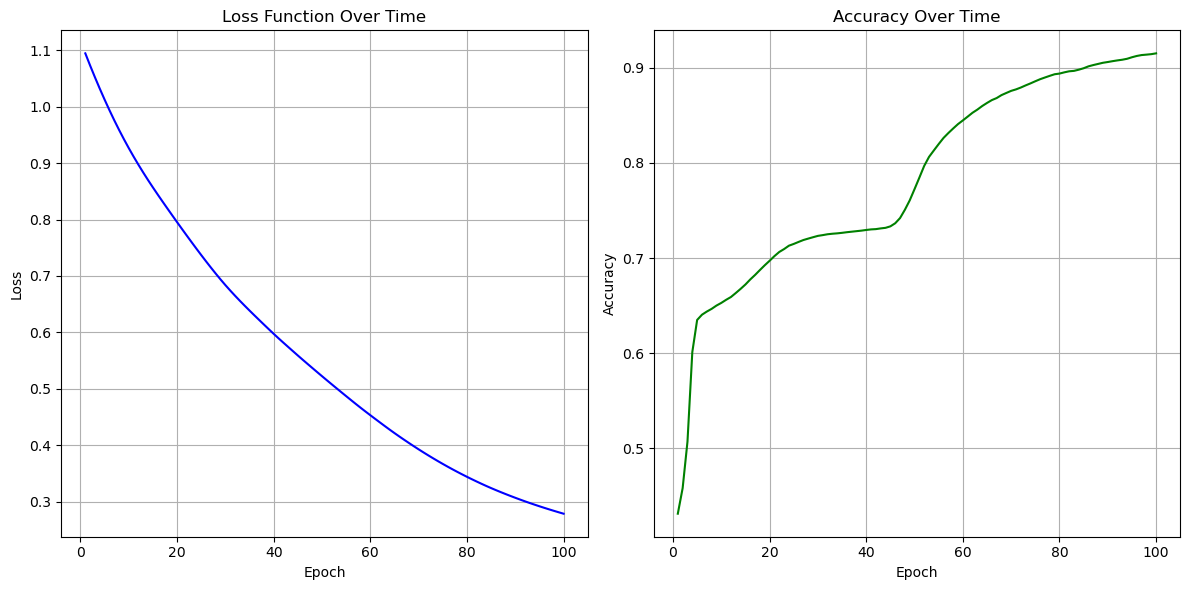

In [4]:

file_path = "star_classification.csv"  # Replace with the correct file path

# Load and preprocess data
X_train, X_test, y_train, y_test, num_classes = load_and_preprocess_data(file_path)
input_size = X_train.shape[1]

# Initialize the model
model = StellarClassificationNN(input_size, num_classes)
print(model)

# Train the model and plot the loss
train_model_with_loss_plot(model, X_train, y_train, X_test, y_test, num_epochs=100, learning_rate=0.001)


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import numpy as np

# 5-fold cross-validation with plotting
def cross_validate_model_with_plots(model_class, X, y, num_classes, num_epochs=20, learning_rate=0.001, k_folds=5):
    # Initialize the KFold object
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    
    fold_accuracies = []
    all_loss_histories = []  # Store loss for each fold
    all_accuracy_histories = []  # Store accuracy for each fold
    
    # Iterate through each fold
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"\n=== Fold {fold+1}/{k_folds} ===")
        
        # Split the data into training and validation sets
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Convert to PyTorch tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.long)
        X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
        y_val_tensor = torch.tensor(y_val, dtype=torch.long)
        
        # Initialize a new model for each fold
        model = model_class(X_train.shape[1], num_classes)
        
        # Define loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
        
        # Track loss and accuracy
        loss_history = []
        accuracy_history = []
        
        # Train the model
        for epoch in range(num_epochs):
            model.train()
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
            loss_history.append(loss.item())  # Record loss
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Evaluate the model on validation data
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_tensor)
                _, val_predictions = torch.max(val_outputs, 1)
                val_accuracy = (val_predictions == y_val_tensor).sum().item() / y_val_tensor.size(0)
                accuracy_history.append(val_accuracy)  # Record accuracy
        
        print(f"Fold {fold+1} Final Accuracy: {val_accuracy:.4f}")
        fold_accuracies.append(val_accuracy)
        all_loss_histories.append(loss_history)
        all_accuracy_histories.append(accuracy_history)
    
    # Plot loss and accuracy for each fold
    plt.figure(figsize=(12, 6))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    for fold, loss_history in enumerate(all_loss_histories):
        plt.plot(range(1, num_epochs + 1), loss_history, label=f"Fold {fold + 1}")
    plt.title("Loss Across Folds")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    
    # Accuracy Plot
    plt.subplot(1, 2, 2)
    for fold, accuracy_history in enumerate(all_accuracy_histories):
        plt.plot(range(1, num_epochs + 1), accuracy_history, label=f"Fold {fold + 1}")
    plt.title("Accuracy Across Folds")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    # Average accuracy across all folds
    avg_accuracy = np.mean(fold_accuracies)
    print(f"\nAverage Accuracy Across Folds: {avg_accuracy:.4f}")
    
    return avg_accuracy



SoftmaxModel(
  (linear): Linear(in_features=8, out_features=3, bias=True)
)
Epoch [1/100], Loss: 1.1531, Test Accuracy: 0.3755
Epoch [2/100], Loss: 1.1514, Test Accuracy: 0.3766
Epoch [3/100], Loss: 1.1497, Test Accuracy: 0.3774
Epoch [4/100], Loss: 1.1480, Test Accuracy: 0.3788
Epoch [5/100], Loss: 1.1463, Test Accuracy: 0.3792
Epoch [6/100], Loss: 1.1447, Test Accuracy: 0.3802
Epoch [7/100], Loss: 1.1430, Test Accuracy: 0.3810
Epoch [8/100], Loss: 1.1413, Test Accuracy: 0.3816
Epoch [9/100], Loss: 1.1397, Test Accuracy: 0.3827
Epoch [10/100], Loss: 1.1381, Test Accuracy: 0.3837
Epoch [11/100], Loss: 1.1364, Test Accuracy: 0.3842
Epoch [12/100], Loss: 1.1348, Test Accuracy: 0.3853
Epoch [13/100], Loss: 1.1332, Test Accuracy: 0.3861
Epoch [14/100], Loss: 1.1316, Test Accuracy: 0.3862
Epoch [15/100], Loss: 1.1299, Test Accuracy: 0.3871
Epoch [16/100], Loss: 1.1283, Test Accuracy: 0.3878
Epoch [17/100], Loss: 1.1267, Test Accuracy: 0.3882
Epoch [18/100], Loss: 1.1252, Test Accuracy: 0.3

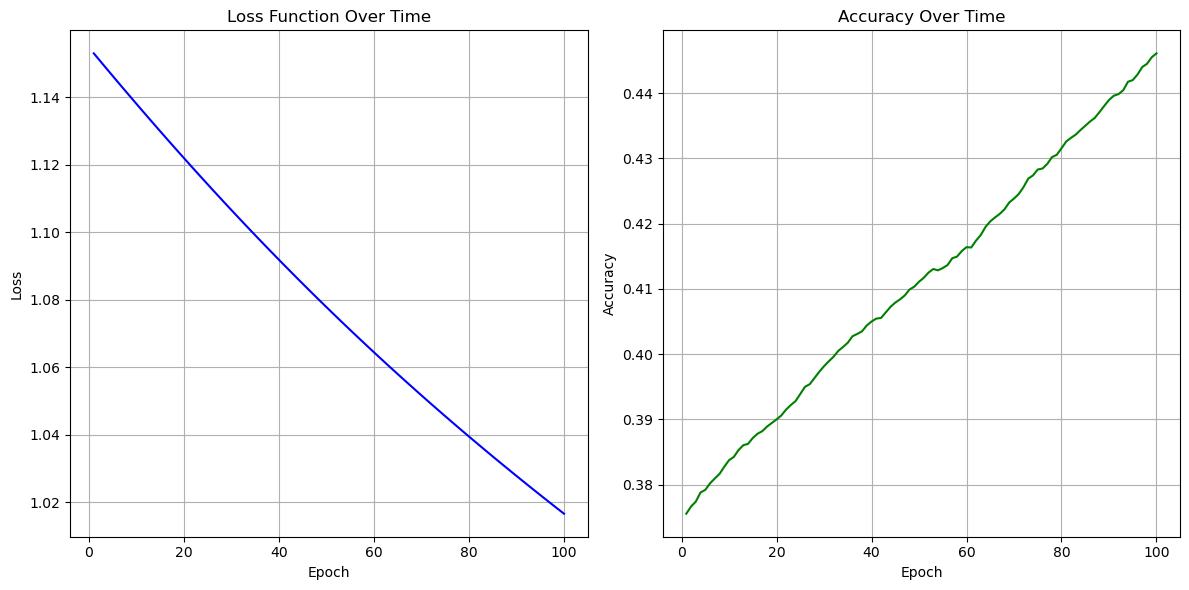

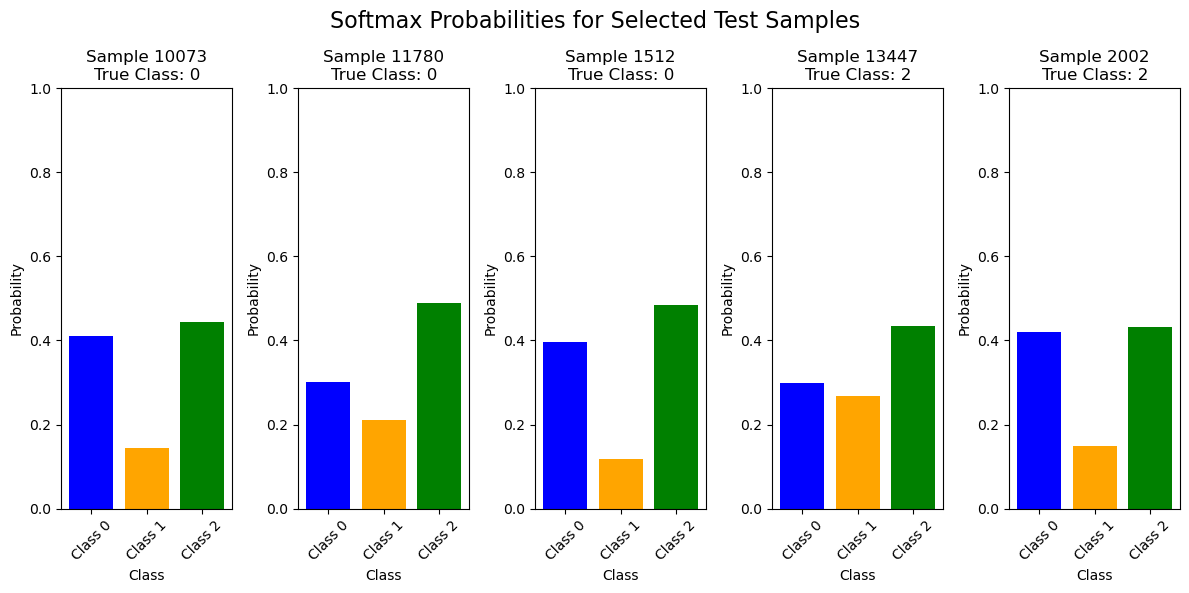

In [7]:
import torch.nn.functional as F

# Define the Softmax-based Model (Logistic Regression)
class SoftmaxModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxModel, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)  # Outputs raw logits

# Training function with loss and accuracy tracking
def train_softmax_model_with_loss_plot(model, X_train, y_train, X_test, y_test, num_epochs=20, learning_rate=0.001):
    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Store loss and accuracy values
    loss_history = []
    accuracy_history = []
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        # Forward pass
        logits = model(X_train)
        loss = criterion(logits, y_train)
        loss_history.append(loss.item())  # Record loss
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Evaluation on test set
        model.eval()
        with torch.no_grad():
            test_logits = model(X_test)
            test_probs = F.softmax(test_logits, dim=1)  # Compute probabilities
            _, predicted = torch.max(test_probs, 1)
            accuracy = (predicted == y_test).sum().item() / y_test.size(0)
            accuracy_history.append(accuracy)  # Record accuracy
        
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Accuracy: {accuracy:.4f}")
    
    # Plot the loss and accuracy curves
    plt.figure(figsize=(12, 6))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), loss_history, linestyle='-', color='b')
    plt.title("Loss Function Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), accuracy_history, linestyle='-', color='g')
    plt.title("Accuracy Over Time")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    return model

# Softmax probability visualization function
def visualize_softmax_probabilities(model, X_test, y_test, num_classes=3, num_samples_to_plot=5):
    model.eval()
    with torch.no_grad():
        logits = model(X_test)
        probabilities = F.softmax(logits, dim=1)
    
    # Select random samples
    samples_indices = np.random.choice(len(X_test), num_samples_to_plot, replace=False)
    selected_probabilities = probabilities[samples_indices]
    selected_classes = y_test[samples_indices]
    
    # Plot softmax probabilities
    plt.figure(figsize=(12, 6))
    
    for i, (probs, true_class) in enumerate(zip(selected_probabilities, selected_classes)):
        plt.subplot(1, num_samples_to_plot, i + 1)
        plt.bar(range(num_classes), probs.tolist(), color=['blue', 'orange', 'green'])
        plt.xticks(range(num_classes), [f"Class {i}" for i in range(num_classes)], rotation=45)
        plt.ylim(0, 1)
        plt.title(f"Sample {samples_indices[i]}\nTrue Class: {true_class.item()}")
        plt.xlabel("Class")
        plt.ylabel("Probability")
    
    plt.tight_layout()
    plt.suptitle("Softmax Probabilities for Selected Test Samples", fontsize=16)
    plt.subplots_adjust(top=0.85)
    plt.show()

# Initialize the Softmax model
model = SoftmaxModel(input_size, num_classes)
print(model)

# Train the model and plot the loss
trained_model = train_softmax_model_with_loss_plot(model, X_train, y_train, X_test, y_test, num_epochs=100, learning_rate=0.001)

# Visualize softmax probabilities
visualize_softmax_probabilities(trained_model, X_test, y_test, num_classes=num_classes)


In [ ]:
# Main function
if __name__ == "__main__":
    file_path = "star_classification.csv"  # Replace with the correct file path
    
    # Load and preprocess data
    X_train, X_test, y_train, y_test, num_classes = load_and_preprocess_data(file_path)
    
    # Concatenate train and test sets for cross-validation
    X_all = np.vstack((X_train, X_test))
    y_all = np.hstack((y_train, y_test))
    
    # Perform 5-fold cross-validation with plots
    avg_accuracy__NN = cross_validate_model_with_plots(StellarClassificationNN, X_all, y_all, num_classes, num_epochs=100, k_folds=5)
    avg_accuracy_SM = cross_validate_model_with_plots(SoftmaxModel, X_all, y_all, num_classes, num_epochs=100, k_folds=5)




=== Fold 1/5 ===
Fold 1 Final Accuracy: 0.9135

=== Fold 2/5 ===
Fold 2 Final Accuracy: 0.9053

=== Fold 3/5 ===
Fold 3 Final Accuracy: 0.9144

=== Fold 4/5 ===
Fold 4 Final Accuracy: 0.9146

=== Fold 5/5 ===
